# Cell Classification using CNN

**Content**:
This notebook demonstrates the use of Convolutional Neural Networks (CNNs) for classifying blood cell images into four categories: EOSINOPHIL, LYMPHOCYTE, MONOCYTE, and NEUTROPHIL. The workflow includes data preprocessing, model training, evaluation, and visualization of results.

**Dataset**:  
The dataset used in this notebook is available at [Kaggle - Blood Cell Images](https://www.kaggle.com/datasets/paultimothymooney/blood-cells). It contains images of blood cells categorized into four classes.

**Method**:  
We employ Convolutional Neural Networks (CNNs) to classify the blood cell images. CNNs are particularly effective for image classification tasks due to their ability to capture spatial hierarchies in images.

**Methodology**:
- This notebook has gaps that you have to fill. If all gaps are filled in correctly, the notebook can be run.
- A solution notebook with all gaps filled is provided in the GitHub repository.
- Gaps are marked with a `#TODO`

**Source, Inspiration**:  
This notebook is inspired by [Blood Cell Images Using CNN Model (98.5%)](https://www.kaggle.com/code/mohamedgobara/blood-cell-images-using-cnn-model-98-5/notebook).

## 1. Imports and Data

- `os`: For interacting with the operating system.
- `pandas`: For tabular data manipulation and visualisation.
- `numpy`: For numerical computations.
- `keras`: A high-level neural networks API for building and training deep learning models.
- `warnings`: Used to manage and suppress warning messages.
- `matplotlib.pyplot`: For plotting.
- `skimage.io`: Part of the scikit-image library, used for reading and writing images.
- `seaborn`: A statistical data visualization library built on top of matplotlib.
- `tensorflow`: An open-source library for machine learning and deep learning.
- `sklearn`: A library for machine learning, including tools for preprocessing, model selection, and evaluation.

In [2]:
import warnings
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.utils import plot_model

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

# warnings.filterwarnings(action="ignore")

## 2. Format Training, Test and Validation data

In [3]:
# Train data
EOSINOPHIL_dir = r'data/.dataset2-master/images/TRAIN/EOSINOPHIL'
LYMPHOCYTE_dir = r'data/.dataset2-master/images/TRAIN/LYMPHOCYTE'
MONOCYTE_dir = r'data/.dataset2-master/images/TRAIN/MONOCYTE'
NEUTROPHIL_dir = r'data/.dataset2-master/images/TRAIN/NEUTROPHIL'

filepaths = []
labels = []
dir_list = [EOSINOPHIL_dir, LYMPHOCYTE_dir, MONOCYTE_dir, NEUTROPHIL_dir]
class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

for i, dir in enumerate(dir_list):
    flist = os.listdir(dir)
    for f in flist:
        fpath = os.path.join(dir, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

bloodCellTrain_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})
print(bloodCellTrain_df["labels"].value_counts())
bloodCellTrain_df

labels
NEUTROPHIL    2499
EOSINOPHIL    2497
LYMPHOCYTE    2483
MONOCYTE      2478
Name: count, dtype: int64


,filepaths,labels
0,data/.dataset2-master/images/TRAIN/EOSINOPHIL\...,EOSINOPHIL
1,data/.dataset2-master/images/TRAIN/EOSINOPHIL\...,EOSINOPHIL
2,data/.dataset2-master/images/TRAIN/EOSINOPHIL\...,EOSINOPHIL
3,data/.dataset2-master/images/TRAIN/EOSINOPHIL\...,EOSINOPHIL
4,data/.dataset2-master/images/TRAIN/EOSINOPHIL\...,EOSINOPHIL
...,...,...
9952,data/.dataset2-master/images/TRAIN/NEUTROPHIL\...,NEUTROPHIL
9953,data/.dataset2-master/images/TRAIN/NEUTROPHIL\...,NEUTROPHIL
9954,data/.dataset2-master/images/TRAIN/NEUTROPHIL\...,NEUTROPHIL
9955,data/.dataset2-master/images/TRAIN/NEUTROPHIL\...,NEUTROPHIL


In [4]:
# Test data
EOSINOPHIL_dir_test = r'data/.dataset2-master/images/TEST/EOSINOPHIL'
LYMPHOCYTE_dir_test = r'data/.dataset2-master/images/TEST/LYMPHOCYTE'
MONOCYTE_dir_test = r'data/.dataset2-master/images/TEST/MONOCYTE'
NEUTROPHIL_dir_test = r'data/.dataset2-master/images/TEST/NEUTROPHIL'

filepaths_test = []
labels_test = []
dir_list_test = [EOSINOPHIL_dir_test, LYMPHOCYTE_dir_test, MONOCYTE_dir_test, NEUTROPHIL_dir_test]
class_labels_test = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']

for i, dir in enumerate(dir_list_test):
    flist = os.listdir(dir)
    for f in flist:
        fpath = os.path.join(dir, f)
        filepaths_test.append(fpath)
        labels_test.append(class_labels_test[i])

bloodCellTest_df = pd.DataFrame({'filepaths': filepaths_test, 'labels': labels_test})
print(bloodCellTest_df["labels"].value_counts())
bloodCellTest_df

labels
NEUTROPHIL    624
EOSINOPHIL    623
LYMPHOCYTE    620
MONOCYTE      620
Name: count, dtype: int64


,filepaths,labels
0,data/.dataset2-master/images/TEST/EOSINOPHIL\_...,EOSINOPHIL
1,data/.dataset2-master/images/TEST/EOSINOPHIL\_...,EOSINOPHIL
2,data/.dataset2-master/images/TEST/EOSINOPHIL\_...,EOSINOPHIL
3,data/.dataset2-master/images/TEST/EOSINOPHIL\_...,EOSINOPHIL
4,data/.dataset2-master/images/TEST/EOSINOPHIL\_...,EOSINOPHIL
...,...,...
2482,data/.dataset2-master/images/TEST/NEUTROPHIL\_...,NEUTROPHIL
2483,data/.dataset2-master/images/TEST/NEUTROPHIL\_...,NEUTROPHIL
2484,data/.dataset2-master/images/TEST/NEUTROPHIL\_...,NEUTROPHIL
2485,data/.dataset2-master/images/TEST/NEUTROPHIL\_...,NEUTROPHIL


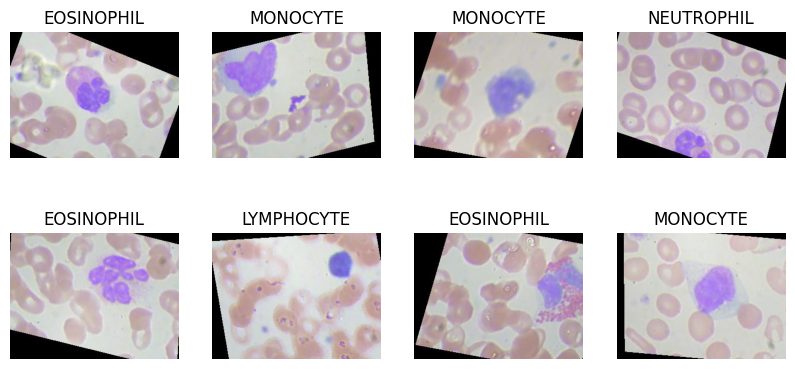

In [29]:
# visualize a few random images of the trainign data df
import matplotlib.pyplot as plt
import skimage.io

plt.figure(figsize=(10, 10))
list_random_images = bloodCellTrain_df.sample(n=8, random_state=123)
for i in range(8):
    plt.subplot(4, 4, i + 1)
    random_image_path = list_random_images.iloc[i]['filepaths']
    random_image = skimage.io.imread(random_image_path)
    random_image_label = list_random_images.iloc[i]['labels']
    plt.imshow(random_image)
    plt.title(random_image_label)
    plt.axis('off')
plt.show()

In [6]:
train_test_ratio = bloodCellTest_df.shape[0] / bloodCellTrain_df.shape[0]
print(f"Train Test Ratio (number of test data / number of train data): {train_test_ratio:.2f}")

Train Test Ratio (number of test data / number of train data): 0.25


In [7]:
train_images, val_images = train_test_split(bloodCellTrain_df, test_size=0.25, random_state=42)
# train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)
train_images = bloodCellTrain_df
test_images = bloodCellTest_df

In [8]:
# print(train_set.shape)
print(test_images.shape)
print(val_images.shape)
print(train_images.shape)

(2487, 2)
(2490, 2)
(9957, 2)


In [9]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_images,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=8,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=8,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_images,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=8,
                                    shuffle=False
                                   )

Found 9957 validated image filenames belonging to 4 classes.
Found 2487 validated image filenames belonging to 4 classes.
Found 2490 validated image filenames belonging to 4 classes.


In [10]:
classes=list(train.class_indices.keys())
print (classes)

['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


## 3. Build the model

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 128)    │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 73, 73, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 73, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 512)      │         2,04

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

## 4. Train the model
train vith train and val

In [ ]:
if not os.path.exists('data/CNN_10epochs.keras'):
    history = model.fit(train, epochs=10, validation_data=val, verbose=1)
    model.save('data/CNN_10epochs.keras')
    np.save('data/history.npy', history.history)
else:
    os.makedirs('data', exist_ok=True)
    model = keras.models.load_model('data/CNN_10epochs.keras')
    history = np.load('data/history.npy', allow_pickle=True).item()

## 5. Evaluate the model 
evaluate the model with test images

In [13]:
loss, accuracy = model.evaluate(test, verbose=1)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

311/311 ━━━━━━━━━━━━━━━━━━━━ 162s 517ms/step - accuracy: 0.7657 - loss: 0.7562
Test loss: 0.6239777207374573
Test accuracy: 0.7989545464515686


In [21]:
pred_num = model.predict(test)
pred_num = np.argmax(pred_num, axis=1) #pick class with highest  probability
# print(f"Predictions (num): {pred_num}")

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
# print(f"Labels: {labels}")
pred = [labels[k] for k in pred_num]
# print(f"Predictions: {pred}")

311/311 ━━━━━━━━━━━━━━━━━━━━ 158s 509ms/step
Predictions (num): [0 3 0 ... 0 3 3]
Labels: {0: 'EOSINOPHIL', 1: 'LYMPHOCYTE', 2: 'MONOCYTE', 3: 'NEUTROPHIL'}
Predictions: ['EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'LYMPHOCYTE', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'NEUTROPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'EOSINOPHIL', 'MONOCYTE', 'EOSI

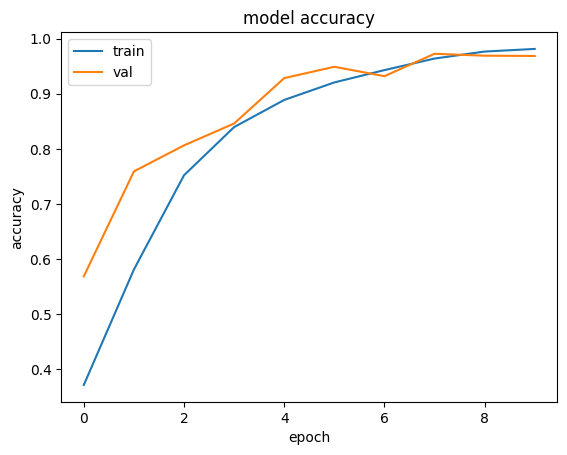

In [22]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

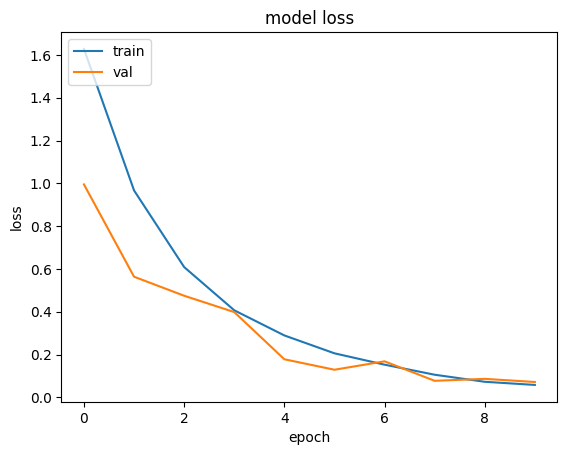

In [23]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred)*100))

              precision    recall  f1-score   support

  EOSINOPHIL       0.74      0.68      0.71       623
  LYMPHOCYTE       0.94      0.97      0.95       620
    MONOCYTE       0.94      0.78      0.85       620
  NEUTROPHIL       0.63      0.76      0.69       624

    accuracy                           0.80      2487
   macro avg       0.81      0.80      0.80      2487
weighted avg       0.81      0.80      0.80      2487

Accuracy of the Model: 79.9%


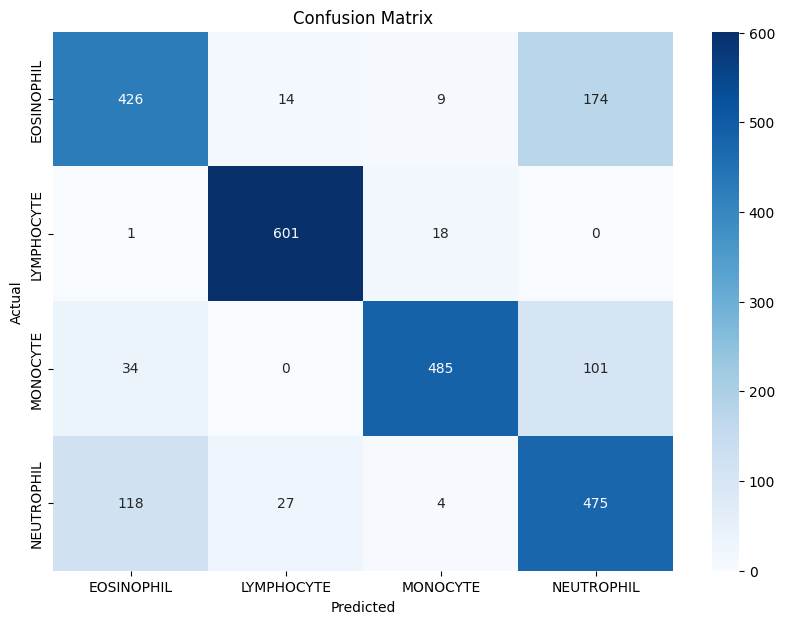

In [25]:
import seaborn as sns

class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']


cm = confusion_matrix(y_test, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

plot sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


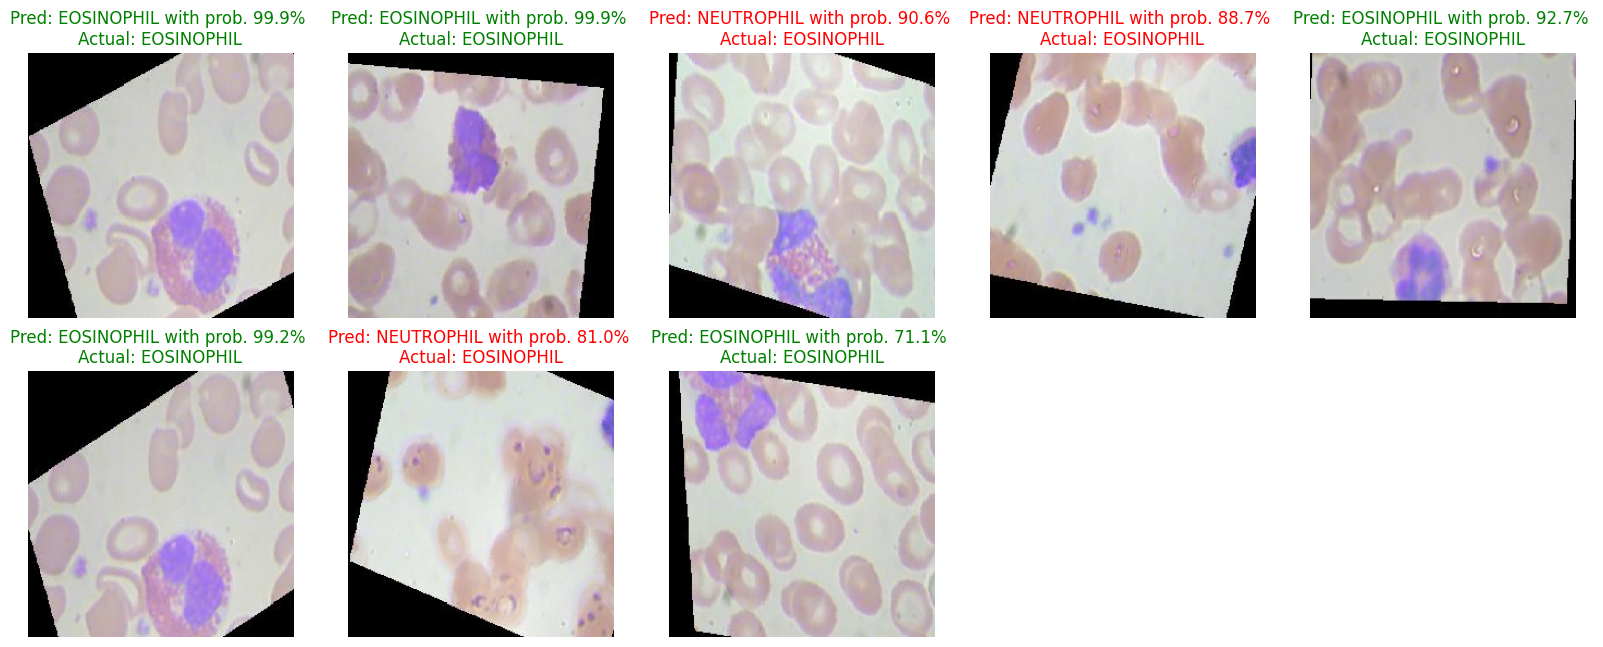

In [27]:
# plot two sample blood images and the predictions and actual labels
def show_images_with_predictions(image_gen, model):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels = next(image_gen)  # get a sample batch from the generator
    predictions = model.predict(images)  # get predictions from the model
    plt.figure(figsize=(20, 20))
    length = len(labels)
    if length < 25:
        r = length
    else:
        r = 25
    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2  # scale images between 0 and 1
        plt.imshow(image)
        actual_index = np.argmax(labels[i])
        predicted_index = np.argmax(predictions[i])
        prediction_probability = predictions[i][predicted_index]
        actual_class = classes[actual_index]
        predicted_class = classes[predicted_index]
        title_color = "green" if actual_class == predicted_class else "red"
        plt.title(f"Pred: {predicted_class} with prob. {int(prediction_probability*1000)/10}% \nActual: {actual_class}", color=title_color, fontsize=12)
        plt.axis('off')
    plt.show()

# Call the function with the test generator and trained model
show_images_with_predictions(test, model)